In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# NFK international airport data (wind/precipitation)

In [2]:
#import wind/precipitation data
infile_NFK_airport='C:/Users/a_mac/Box Sync/current projects/MTM through the year/0_NFK_weather_review/NCDC_NOAA_precipitation_wind_2000_2018_NFK_IntAirp.csv'
NFK_airport=pd.read_csv(infile_NFK_airport)
#NFK_airport.head()

In [3]:
NFKairport_dayssince = ((NFK_airport.year - 1900)*364.75) + (NFK_airport.month*(364.75/12)) + NFK_airport.day
#NFKairport_dayssince

Text(0.5, 1.0, 'Daily wind speed from NFK international airport')

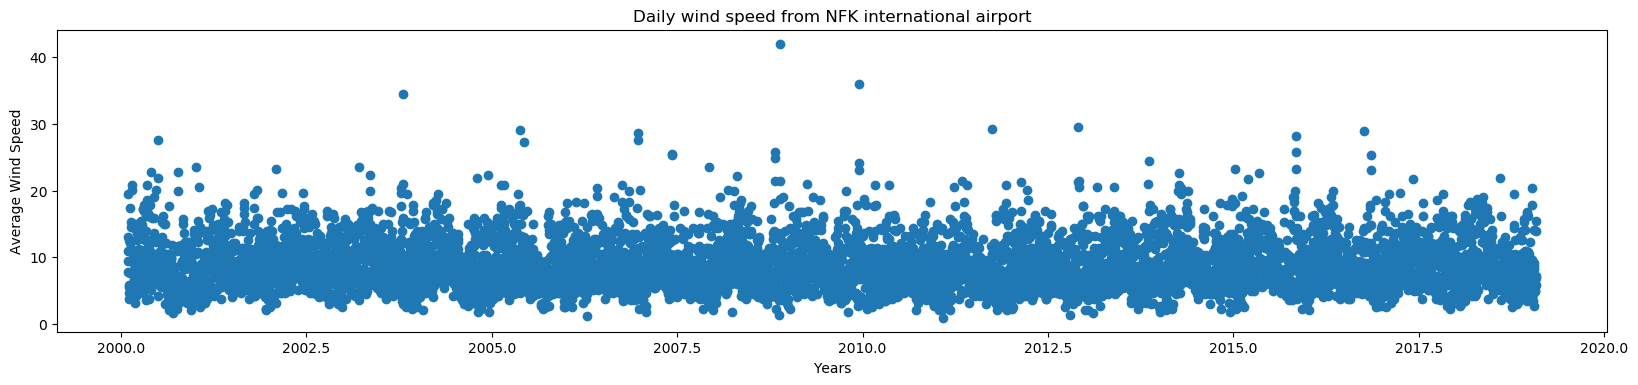

In [4]:
fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.scatter(1900+NFKairport_dayssince/364.75,NFK_airport.AWND)
plt.xlabel('Years')
plt.ylabel('Average Wind Speed')
plt.title('Daily wind speed from NFK international airport')


Filter the wind speed to consider only those from north-east direction (enhacing flooding)


Wind direction is reported by the direction from which it originates. For example, a northerly wind blows from the north to the south.[1] Wind direction is usually reported in cardinal directions or in azimuth degrees. Wind direction is measured in degrees clockwise from due north.

Consequently, a wind blowing from the north has a wind direction of 0° (360°); a wind blowing from the east has a wind direction of 90°; a wind blowing from the south has a wind direction of 180°; and a wind blowing from the west has a wind direction of 270°.

https://en.wikipedia.org/wiki/Wind_direction
    
a north-eastern wind will have a range of direction from >0 to <90°

(2016.1, 2016.2)

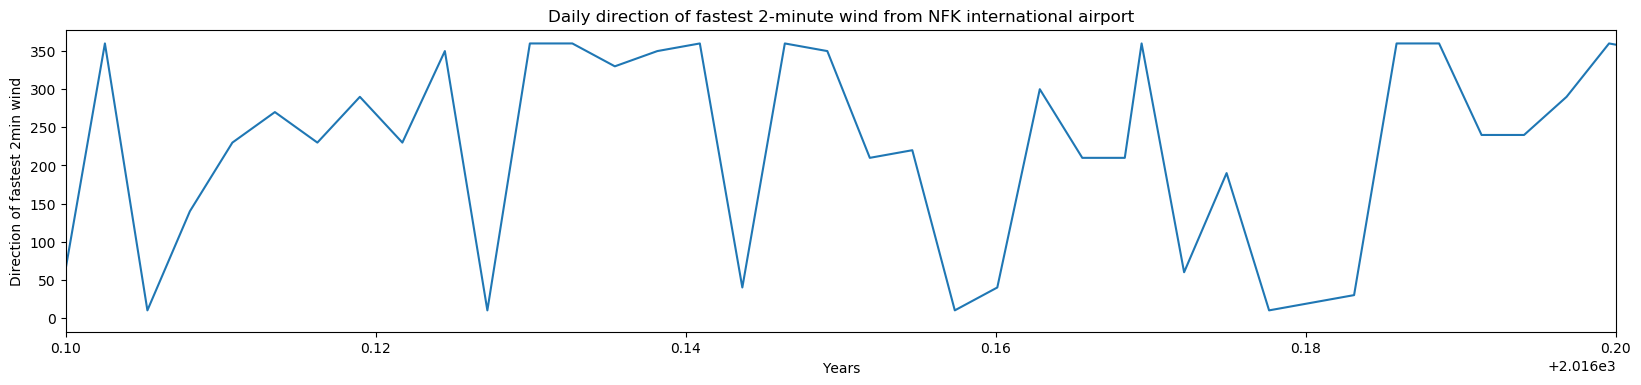

In [5]:
# Direction of fastest 2-minute wind (WDF2) 

fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.plot(1900+NFKairport_dayssince/364.75,NFK_airport.WDF2)
plt.xlabel('Years')
plt.ylabel('Direction of fastest 2min wind')
plt.title('Daily direction of fastest 2-minute wind from NFK international airport')
plt.xlim(2016.1,2016.2)

Text(0.5, 1.0, 'wind speed from north-eastern winds only')

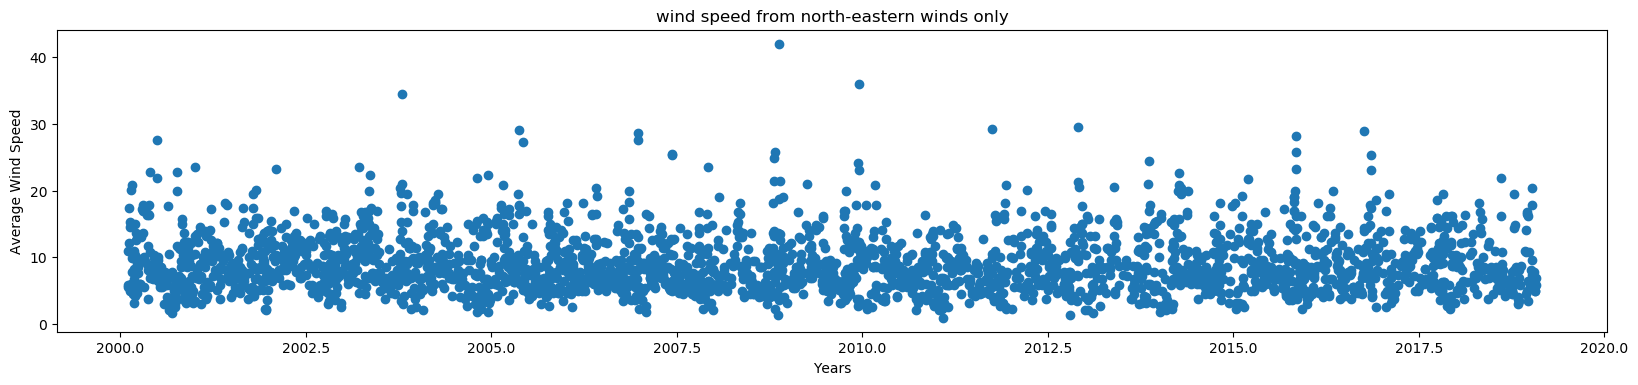

In [6]:
fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.scatter(1900+NFKairport_dayssince[(NFK_airport.WDF2>0)&(NFK_airport.WDF2<90)]/364.75,NFK_airport.AWND[(NFK_airport.WDF2>0)&(NFK_airport.WDF2<90)])
plt.xlabel('Years')
plt.ylabel('Average Wind Speed')
plt.title('wind speed from north-eastern winds only')

In [7]:
# make plot for the other variables in the doc (i.e. precipitation)

Text(0.5, 1.0, 'Daily precipitation from NFK international airport')

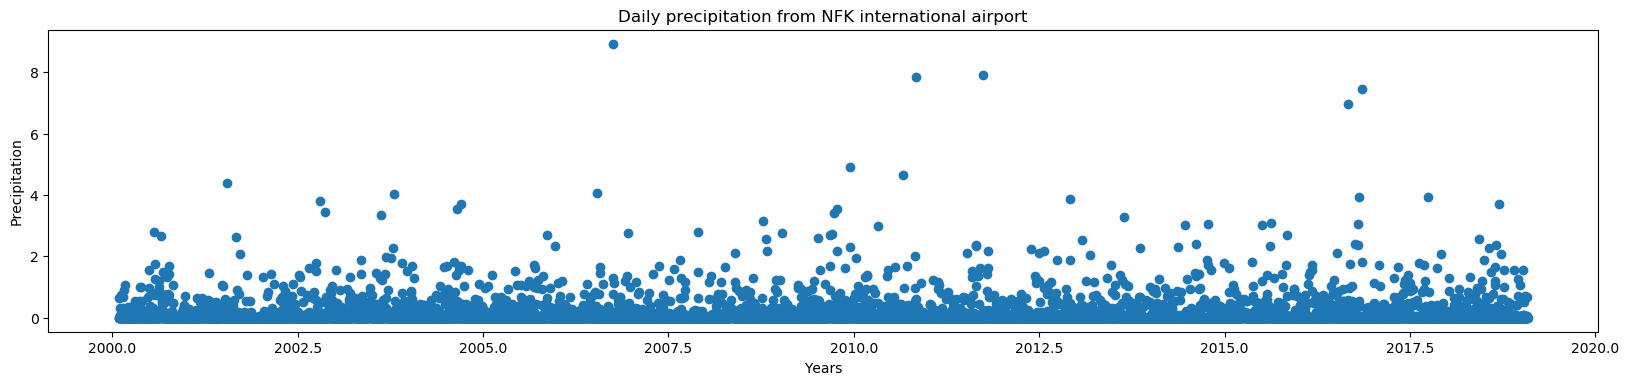

In [8]:
fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.scatter(1900+NFKairport_dayssince/364.75,NFK_airport.PRCP)
plt.xlabel('Years')
plt.ylabel('Precipitation')
plt.title('Daily precipitation from NFK international airport')

# Virginia Estuarine and Coastal Observing System (VECOS) data (i.e. NO3)

In [9]:
# upload VECOS data to have nitrate concentrations available. Plot in a similar maner to wind and precipitation values

In [10]:
#import VECOS (i.e. nutrients) data
infile_VECOS_Laf_head='C:/Users/a_mac/Box Sync/current projects/MTM through the year/0_NFK_weather_review/VECOS Lafayette/VECOS head lafayette_Granby_ long term monitoring station 1998 to 2018.csv'
VECOS_Laf_head=pd.read_csv(infile_VECOS_Laf_head)
#VECOS_Laf_head

In [11]:
VECOS_filter=VECOS_Laf_head[(VECOS_Laf_head.year>1999)&(VECOS_Laf_head.depth<1.5)]
VECOS_filter.Parameter.unique()

array(['CHLA', 'DIN', 'DO', 'DON', 'DOP', 'FCOLI_M', 'FSS', 'KD', 'NH4F',
       'NO23F', 'NO2F', 'NO3F', 'PC', 'PH', 'PHEO', 'PN', 'PO4F', 'PP',
       'SALINITY', 'SECCHI', 'SIF', 'SIGMA_T', 'SPCOND', 'TDN', 'TDP',
       'TN', 'TON', 'TP', 'TSS', 'WTEMP', 'VSS'], dtype=object)

In [12]:
nitrate=VECOS_filter.value[VECOS_filter.Parameter == "NO23F"]
#nitrate

In [13]:
VECOS_NO3_dayssince = ((VECOS_filter.year[VECOS_filter.Parameter == "NO23F"] - 1900)*364.75) + (VECOS_filter.month[VECOS_filter.Parameter == "NO23F"]*(364.75/12)) + VECOS_filter.day[VECOS_filter.Parameter == "NO23F"]

(2000, 2018)

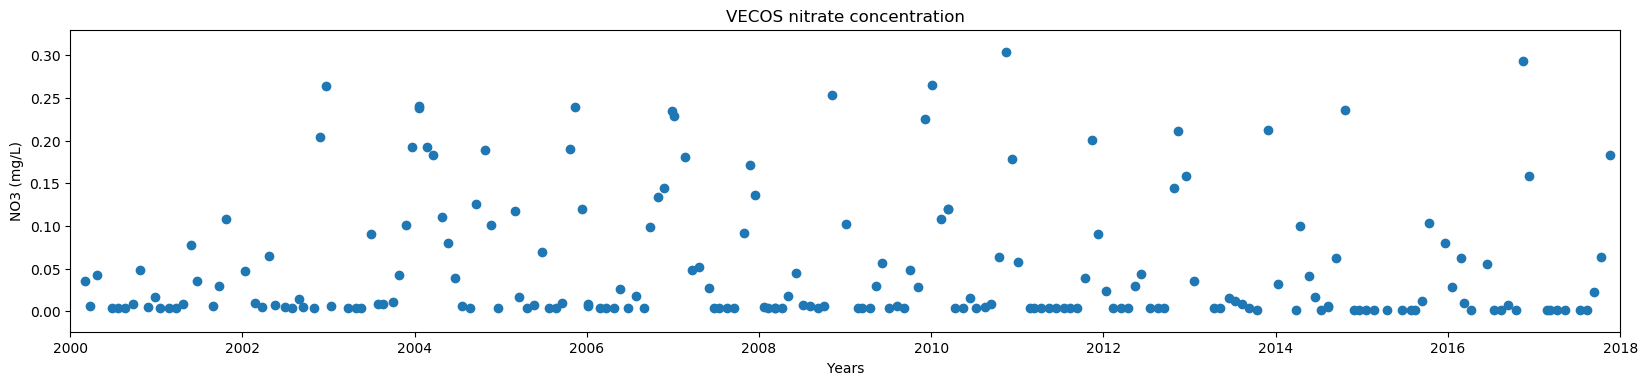

In [14]:
fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.scatter(1900+VECOS_NO3_dayssince/364.75,nitrate)
plt.xlabel('Years')
plt.ylabel('NO3 (mg/L)')
plt.title('VECOS nitrate concentration')
plt.xlim(2000,2018)

In [15]:
# repeat the steps with other variables

In [16]:
ammon=VECOS_filter.value[VECOS_filter.Parameter=="NH4F"]

In [17]:
VECOS_NH4_dayssince = ((VECOS_filter.year[VECOS_filter.Parameter == "NH4F"] - 1900)*364.75) + (VECOS_filter.month[VECOS_filter.Parameter == "NH4F"]*(364.75/12)) + VECOS_filter.day[VECOS_filter.Parameter == "NH4F"]

(2000, 2018)

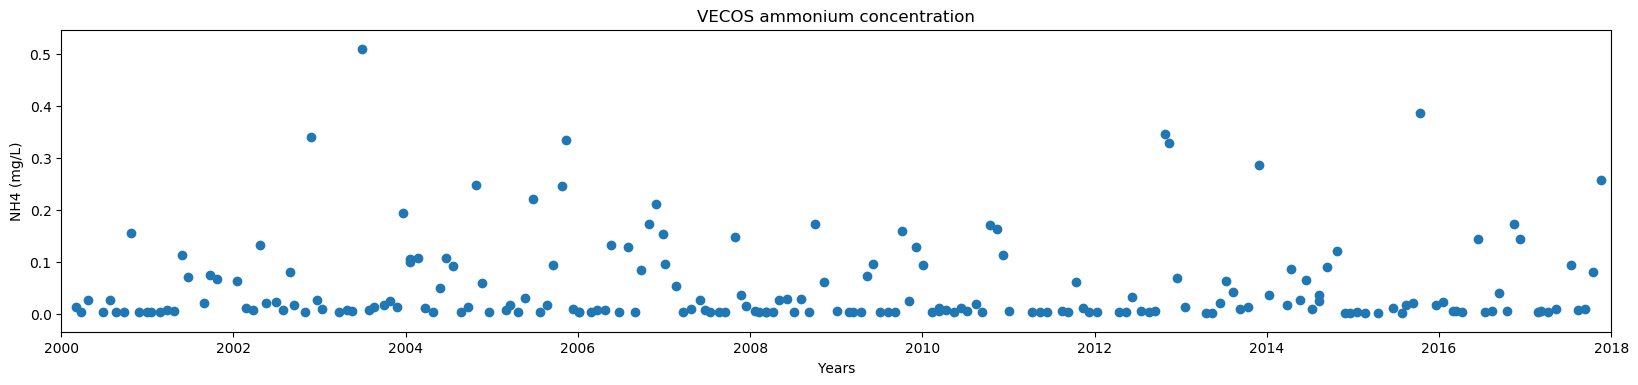

In [18]:
fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.scatter(1900+VECOS_NH4_dayssince/364.75,ammon)
plt.xlabel('Years')
plt.ylabel('NH4 (mg/L)')
plt.title('VECOS ammonium concentration')
plt.xlim(2000,2018)

# Water level data from the NOAA station at Sewelles Point

In [19]:
# get the water level data from Sewells Point, NFK (VA)

In [20]:
#import Water-Level (i.e. MLLW) data
infile_MLLW_Sewells='C:/Users/a_mac/Box Sync/current projects/MTM through the year/0_NFK_weather_review/MLLW_sewellspoint_2000_20018.csv'
MLLW_Sewells=pd.read_csv(infile_MLLW_Sewells)
#MLLW_Sewells

In [21]:
MLLW_Sewells_dayssince = ((MLLW_Sewells.year - 1900)*364.75) + (MLLW_Sewells.month*(364.75/12)) + MLLW_Sewells.day + MLLW_Sewells.Time_GMT

(2000, 2018)

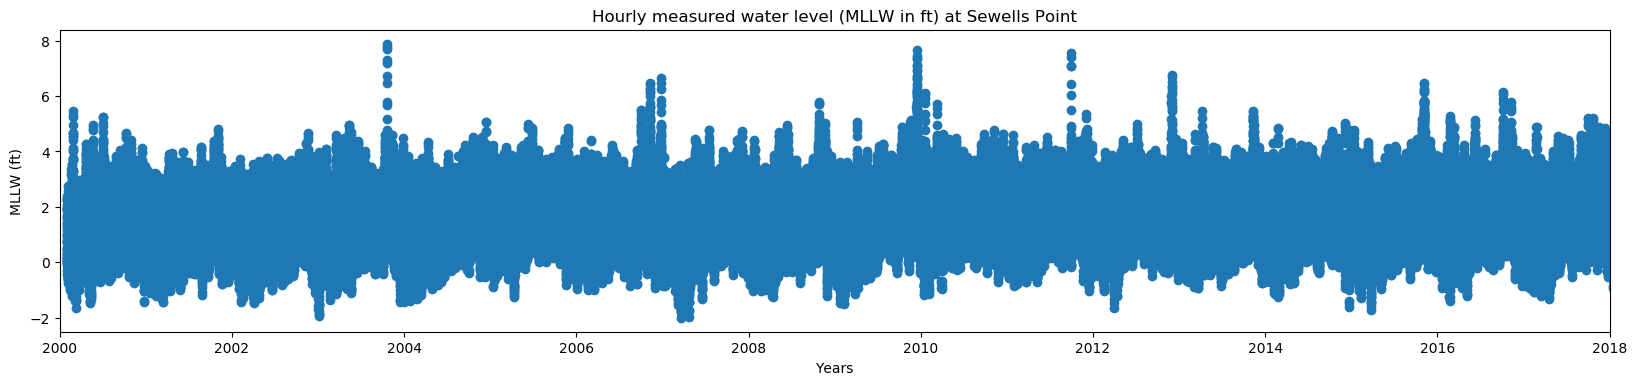

In [22]:
fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
plt.scatter(1900+MLLW_Sewells_dayssince/364.75,MLLW_Sewells.Verified_ft)

plt.xlabel('Years')
plt.ylabel('MLLW (ft)')
plt.title('Hourly measured water level (MLLW in ft) at Sewells Point')
plt.xlim(2000,2018)

(2000, 2018)

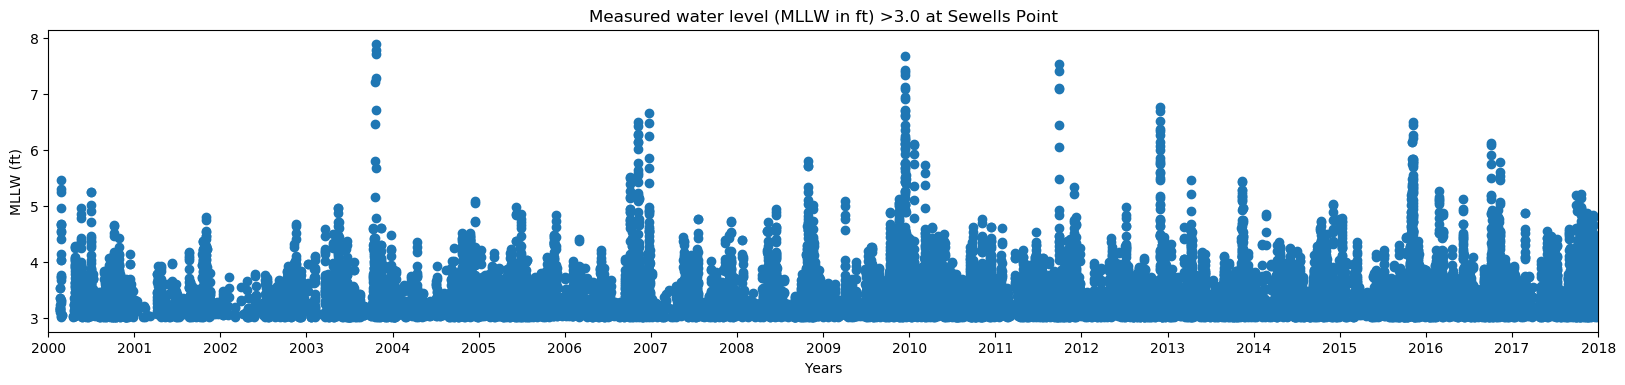

In [23]:
# filter the data to only visualyze events with "high" water level


fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)
#plt.scatter(1900+MLLW_Sewells_dayssince/364.75,MLLW_Sewells[(MLLW_Sewells.Verified_ft>3)])
plt.scatter(1900+MLLW_Sewells_dayssince[(MLLW_Sewells.Verified_ft>3)]/364.75,MLLW_Sewells.Verified_ft[(MLLW_Sewells.Verified_ft>3)])

#nitrate=VECOS_filter.value[VECOS_filter.Parameter == "NO23F"]

plt.xlabel('Years')
plt.ylabel('MLLW (ft)')
plt.title('Measured water level (MLLW in ft) >3.0 at Sewells Point')
ax.set_xticks(np.arange(1999,2019,1))
plt.xlim(2000,2018)

# Compare coverage of data sets (i.e. sample frequency)

(2000, 2018)

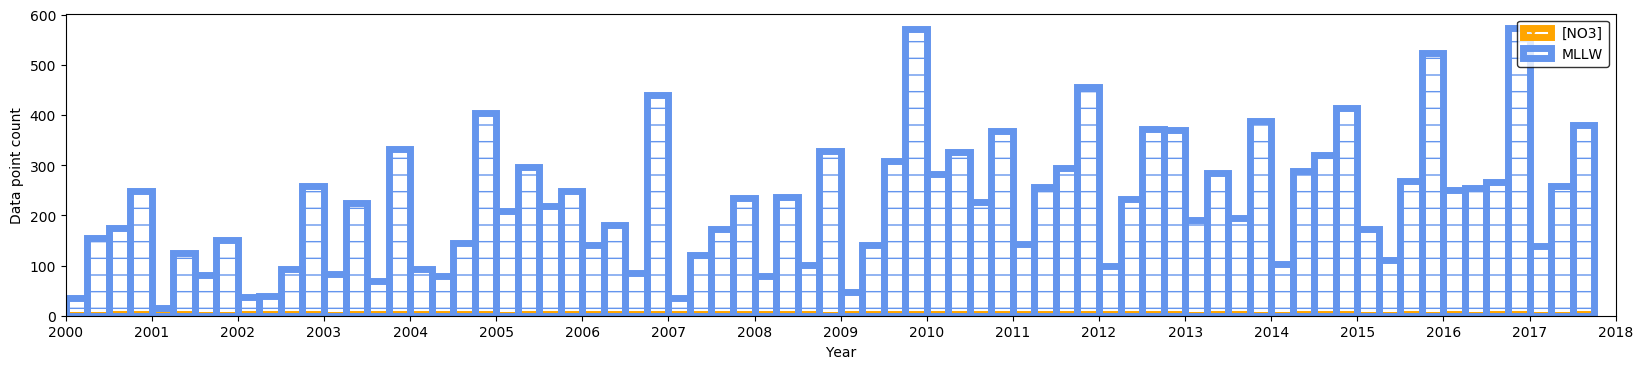

In [24]:
#sampling-date (seasonal) analysis. 
#The code for this is from the work of Corday and Austin!!

fig, (ax) =  plt.subplots(1, 1, figsize = (20, 4), dpi = 100)

bins = np.arange(2000,2018,0.25)

#VECOS_NO3_dayssince
#MLLW_Sewells_dayssince[(MLLW_Sewells.Verified_ft>3)]

plt.hist(1900+VECOS_NO3_dayssince/364.75, edgecolor = "orange", lw = 5, facecolor = "None", bins = bins, hatch = 'X')
plt.hist(1900+MLLW_Sewells_dayssince[(MLLW_Sewells.Verified_ft>3)]/364.75, edgecolor = "cornflowerblue", facecolor = "None", lw = 5, bins = bins, hatch = '-')

ax.set_xlabel('Year')
ax.set_ylabel('Data point count')
ax.legend(('[NO3]', 'MLLW'), edgecolor = 'k', loc = 'upper right')
ax.set_xticks(np.arange(1999,2019,1))
ax.set_xlim([2000,2018])

Text(0.5, 1.0, 'NO3 vs MLLW hourly')

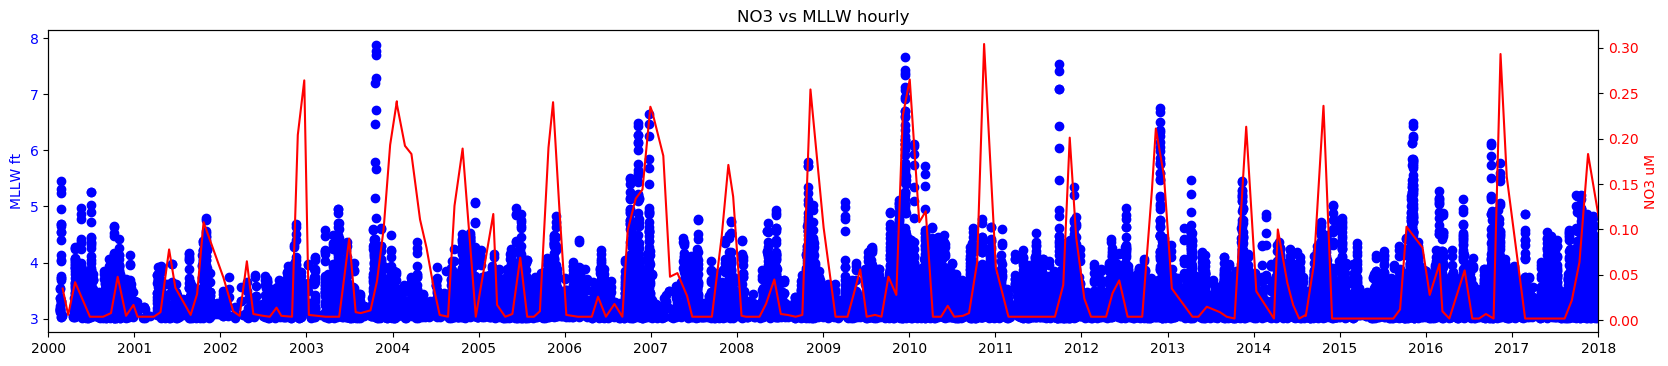

In [25]:

# To observe values, trends and sampling density for each dataset:
# plot nitrate and water level values in the same figure



fig,ax1=plt.subplots(figsize=(20,4),dpi=100,sharex='all')
ax2=ax1.twinx()

#set variable 1
l1=ax1.scatter(1900+MLLW_Sewells_dayssince[(MLLW_Sewells.Verified_ft>3)]/364.75,MLLW_Sewells.Verified_ft[(MLLW_Sewells.Verified_ft>3)],color='b')
ax1.set_ylabel(r'MLLW ft',color='b')
ax1.tick_params(axis='y',labelcolor='b')

#set variable 2
l2=ax2.plot(1900+VECOS_NO3_dayssince/364.75,nitrate,color='r')
ax2.set_ylabel(r'NO3 uM',color='r')
ax2.tick_params(axis='y',labelcolor='r')
ax2.set_xticks(np.arange(1999,2019,1))
ax2.set_xlim(2000,2018)
ax2.set_title('NO3 vs MLLW hourly')

In [26]:
# repeat with other variables (i.e. ammonium, phosphate, etc.)

Text(0.5, 1.0, 'NH4 vs MLLW hourly')

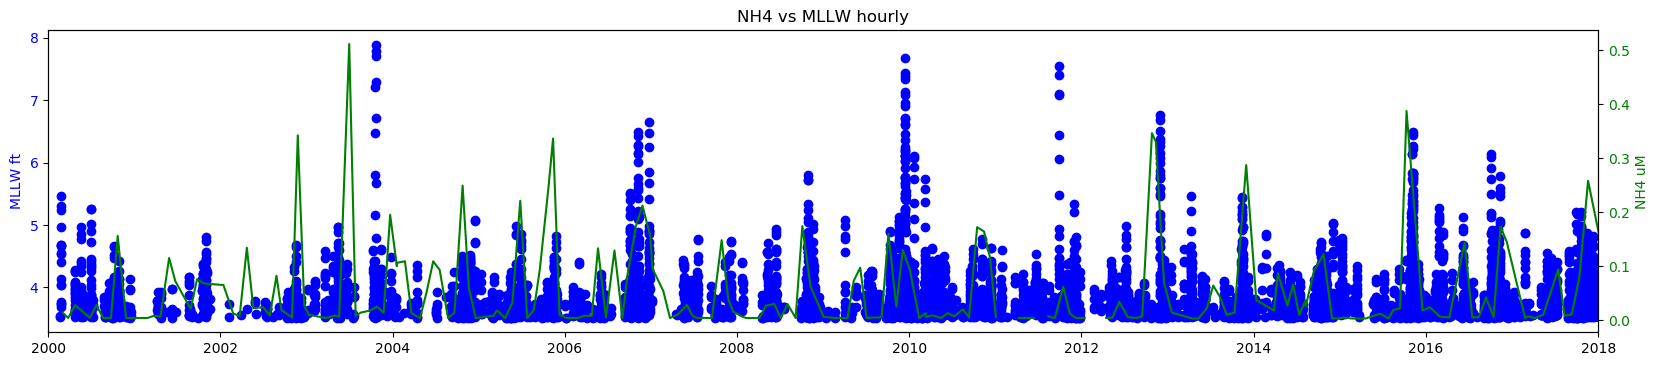

In [27]:
fig,ax1=plt.subplots(figsize=(20,4),dpi=100,sharex='all')
ax2=ax1.twinx()

#set variable 1
l1=ax1.scatter(1900+MLLW_Sewells_dayssince[(MLLW_Sewells.Verified_ft>3.5)]/364.75,MLLW_Sewells.Verified_ft[(MLLW_Sewells.Verified_ft>3.5)],color='b')
ax1.set_ylabel(r'MLLW ft',color='b')
ax1.tick_params(axis='y',labelcolor='b')

#set variable 2
l2=ax2.plot(1900+VECOS_NH4_dayssince/364.75,ammon,color='g')
ax2.set_ylabel(r'NH4 uM',color='g')
ax2.tick_params(axis='y',labelcolor='g')
ax2.set_xlim(2000,2018)
ax2.set_title('NH4 vs MLLW hourly')

# Extract/calcuate the highest water level per day

Hourly values are good to observe trends among nutrient and water level datasets. However, nutrient concentrations are only available per day. Therefore, we need to calculate a single water level value to be compared with nutrient concentrations.

Given the project question/hypothesis, we will extract the highest water level per day to be compared with a response in nutrient concentrations in the Lafayette River. 


In [28]:
OutputFileName_MLLWmax="maxMLLWperday.csv"
OutputFile_MLLWmax=open(OutputFileName_MLLWmax,"w")
OutputFile_MLLWmax.write("date,month,day,year,mean_ft,max_ft\n")

for i in MLLW_Sewells.Date.unique():
    maximMLLW=np.max(MLLW_Sewells.Verified_ft[MLLW_Sewells.Date==i])
    Date=i
    month=np.mean(MLLW_Sewells.month[MLLW_Sewells.Date==i])
    day=np.mean(MLLW_Sewells.day[MLLW_Sewells.Date==i])
    year=np.mean(MLLW_Sewells.year[MLLW_Sewells.Date==i])
    avgMLLW=np.mean(MLLW_Sewells.Verified_ft[MLLW_Sewells.Date==i])
    Ouputstring_MLLWmax= "%s,%i,%i,%i,%f,%f" % (Date,month,day,year,avgMLLW,maximMLLW)
    OutputFile_MLLWmax.write(Ouputstring_MLLWmax + "\n")

In [29]:
MLLW_Sewells_max=pd.read_csv(OutputFileName_MLLWmax)
MLLW_Sewells_max

,date,month,day,year,mean_ft,max_ft
0,1/1/2000,1,1,2000,0.965417,2.31
1,1/2/2000,1,2,2000,1.019583,2.41
2,1/3/2000,1,3,2000,0.669167,2.07
3,1/4/2000,1,4,2000,0.462500,1.80
4,1/5/2000,1,5,2000,0.891250,2.75
5,1/6/2000,1,6,2000,0.637917,2.04
6,1/7/2000,1,7,2000,0.900417,2.34
7,1/8/2000,1,8,2000,0.921250,2.31
8,1/9/2000,1,9,2000,0.712083,2.14
9,1/10/2000,1,10,2000,1.038333,2.53


# Compare coverage of new data sets (i.e. sample frequency)

Use the new water level water to plot new time lines that include nutrient concentrations

In [30]:
MLLW_Sewells_max_daysince=((MLLW_Sewells_max.year - 1900)*364.75) + (MLLW_Sewells_max.month*(364.75/12)) + MLLW_Sewells_max.day 
#MLLW_Sewells_max_daysince

Text(0.5, 1.0, 'NO3 vs highest MLLW perday')

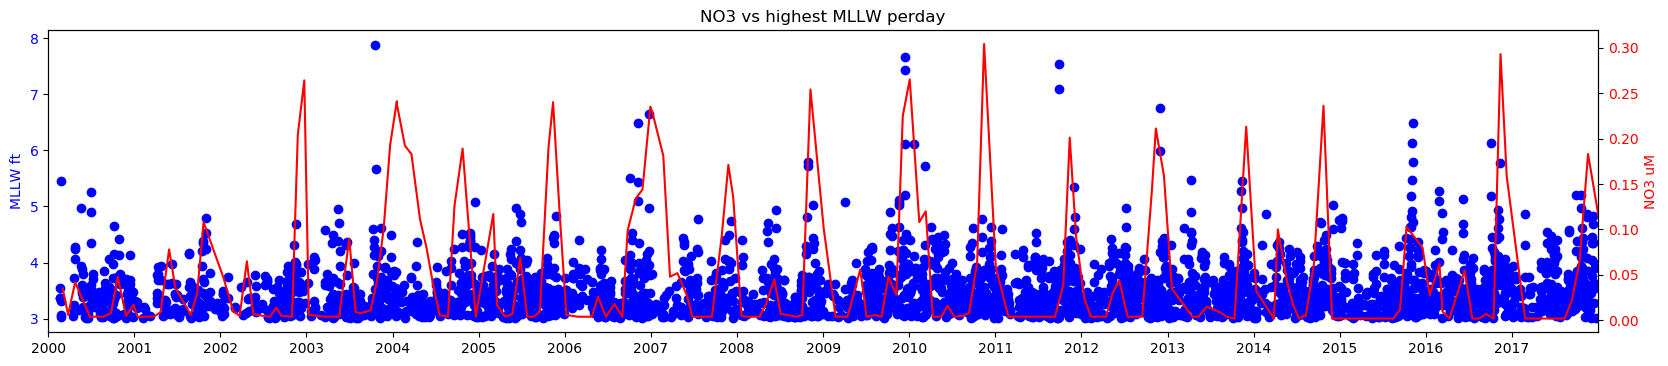

In [31]:
fig,ax1=plt.subplots(figsize=(20,4),dpi=100,sharex='all')
ax2=ax1.twinx()

#set variable 1
l1=ax1.scatter(1900+MLLW_Sewells_max_daysince[(MLLW_Sewells_max.max_ft>3)]/364.75,MLLW_Sewells_max.max_ft[(MLLW_Sewells_max.max_ft>3)],color='b')
ax1.set_ylabel(r'MLLW ft',color='b')
ax1.tick_params(axis='y',labelcolor='b')
ax1.set_xticks(np.arange(1999,2018,1))

#set variable 2
l2=ax2.plot(1900+VECOS_NO3_dayssince/364.75,nitrate,color='r')
ax2.set_ylabel(r'NO3 uM',color='r')
ax2.tick_params(axis='y',labelcolor='r')
ax2.set_xticks(np.arange(1999,2018,1))
ax2.set_xlim(2000,2018)
ax2.set_title('NO3 vs highest MLLW perday')

# Combine the datasets (nutrients, wind/precipitation, and water level) for matching dates

All the data sets have one value per day. However, VECOS (nutrient) data has data every other day and not daily like the wind/precipitation and water level datasets.

Build a code to match the days in which all data is available.


In [148]:
OutputFileName = "matchingdays.csv"
OutputFile = open(OutputFileName,"w")
OutputFile.write("month,day,year,windspeed,wind_direction,rain,nitra,maxMLLW\n")
# OutputFile.write("month,day,year,windspeed,wind_direction,rain,nitra\n")
# OutputFile.write("month,day,year,windspeed,wind_direction,rain\n")
# OutputFile.write("variableID\n")
# OutputFile.write("nitra,maxMLLW\n")


for i in VECOS_filter.date[(VECOS_filter.Parameter == "NO23F")].unique():
    date=NFK_airport.DATE[NFK_airport.DATE==i]
    month=NFK_airport.month[NFK_airport.DATE==i]
    day=NFK_airport.day[NFK_airport.DATE==i]
    year=NFK_airport.year[NFK_airport.DATE==i]
    wind=NFK_airport.AWND[NFK_airport.DATE==i]
    directionwind=NFK_airport.WDF2[NFK_airport.DATE==i]
    rain=NFK_airport.PRCP[NFK_airport.DATE==i]
    nitra=np.max(VECOS_filter.value[(VECOS_filter.Parameter == "NO23F")&(VECOS_filter.date==i)])
    maxMLLW=np.max(MLLW_Sewells_max.max_ft[(MLLW_Sewells_max.date==i)])
#     MLLW=np.max(MLLW_Sewells.Verified_ft[(MLLW_Sewells.Date==i)])

#     print(maxMLLW)

#     Outputstring = "%i,%i,%i,%f,%f,%f,%f" % (month,day,year,wind,directionwind,rain,nitra)
    Outputstring = "%i,%i,%i,%f,%f,%f,%f,%f" % (month,day,year,wind,directionwind,rain,nitra,maxMLLW)
#     Outputstring = "%f,%f" % (nitra,maxMLLW)
    OutputFile.write(Outputstring + "\n")

In [149]:
infile = "matchingdays.csv"
match_data=pd.read_csv(infile)
match_data

,month,day,year,windspeed,wind_direction,rain,nitra,maxMLLW
0,1,31,2000,8.95,270.0,0.00,0.035,2.16
1,2,24,2000,9.40,240.0,0.00,0.006,2.11
2,3,23,2000,10.07,30.0,0.00,0.042,4.25
3,5,25,2000,7.83,250.0,0.10,0.004,2.79
4,6,22,2000,12.30,310.0,0.02,0.004,2.12
5,7,20,2000,7.38,250.0,0.21,0.004,2.98
6,8,23,2000,7.38,220.0,0.00,0.008,2.56
7,9,21,2000,8.95,250.0,0.00,0.048,2.44
8,10,26,2000,8.50,60.0,0.00,0.005,3.04
9,11,27,2000,7.83,250.0,0.00,0.017,2.71


In [150]:
print(np.shape(match_data.rain))
print(np.shape(match_data.nitra))

(204,)
(204,)


Text(0, 0.5, 'NO3 (uM)')

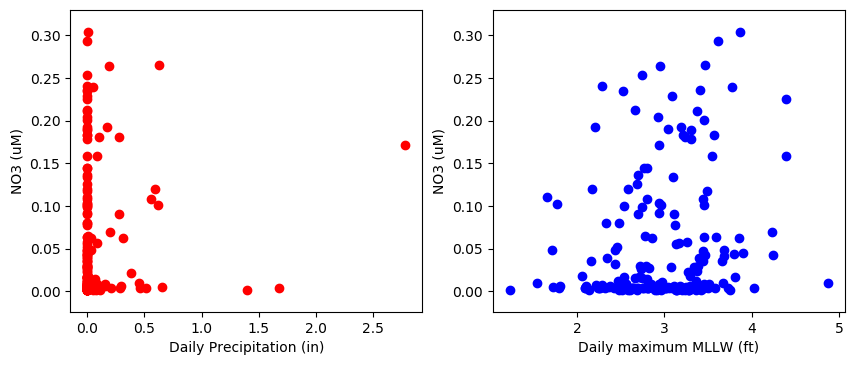

In [159]:
fig, (ax, ax2) =  plt.subplots(1, 2, figsize = (10, 4), dpi = 100)

ax.scatter(match_data.rain,match_data.nitra,color='red')
ax.set_xlabel('Daily Precipitation (in)')
ax.set_ylabel('NO3 (uM)')

ax2.scatter(match_data.maxMLLW,match_data.nitra,color='blue')
ax2.set_xlabel('Daily maximum MLLW (ft)')
ax2.set_ylabel('NO3 (uM)')

Text(0, 0.5, 'NO3(uM)')

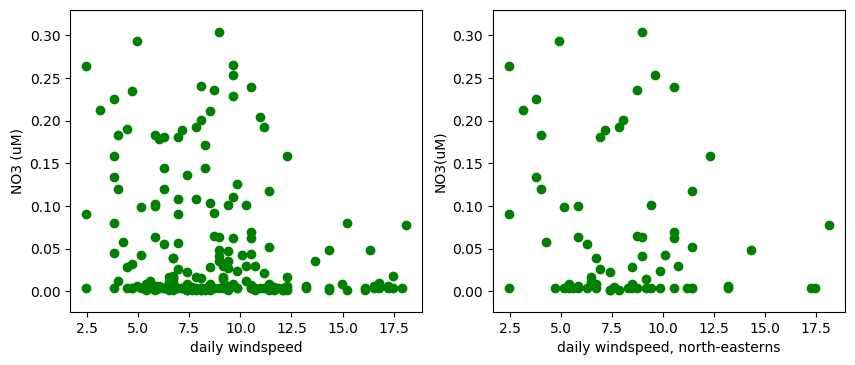

In [171]:
fig, (ax, ax2) = plt.subplots(1,2,figsize = (10,4), dpi=100)

ax.scatter(match_data.windspeed,match_data.nitra,color='green')
ax.set_xlabel('daily windspeed')
ax.set_ylabel('NO3 (uM)')

ax2.scatter(match_data.windspeed[(match_data.wind_direction>0)&(match_data.wind_direction<91)],match_data.nitra[(match_data.wind_direction>0)&(match_data.wind_direction<91)],color='green')
ax2.set_xlabel('daily windspeed, north-easterns')
ax2.set_ylabel('NO3(uM)')

# Use matched-data to build a KNN model